In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('oasis_longitudinal.csv')

In [3]:
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
data.shape

(373, 15)

In [5]:
data.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [6]:
data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [7]:
data.info

<bound method DataFrame.info of     Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    A

In [8]:
df = data.loc[data['Visit']==1]

In [9]:
df = df.reset_index(drop=True)

In [10]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
lab = LabelEncoder()

In [13]:
df['M/F']=lab.fit_transform(df['M/F'])
df['Hand']=lab.fit_transform(df['Hand'])
df['Group']=lab.fit_transform(df['Group'])

In [14]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,2,1,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,OAS2_0002_MR1,1,1,0,1,0,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,OAS2_0004_MR1,2,1,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,OAS2_0005_MR1,2,1,0,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,OAS2_0007_MR1,1,1,0,1,0,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [15]:
dff = df.drop(df[['Subject ID', 'MRI ID','Visit']],axis=1)
dff.head()

,Group,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,0,1,0,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,2,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,2,0,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,1,0,1,0,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [16]:
dff.isnull().sum()

Group       0
MR Delay    0
M/F         0
Hand        0
Age         0
EDUC        0
SES         8
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

In [17]:
df2 = dff.dropna()
df2.isnull().sum()

Group       0
MR Delay    0
M/F         0
Hand        0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

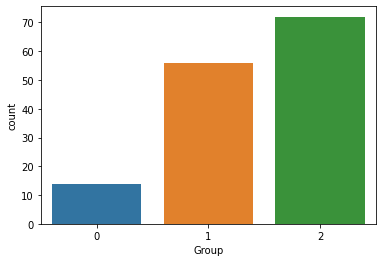

In [18]:
sns.countplot(x='Group',data=df2)

In [19]:
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==1][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar', stacked=True, figsize=(8,5))

Text(0.5, 1.0, 'Gender and demented rate')

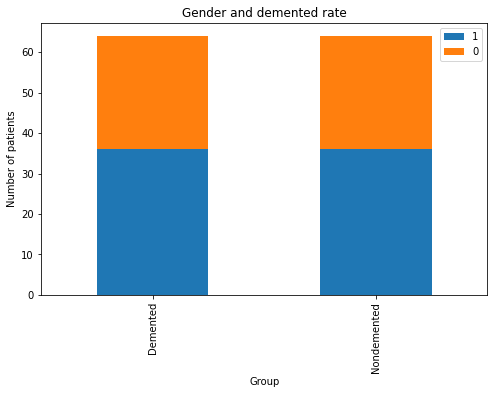

In [20]:
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and demented rate')


(15.3, 30.0)

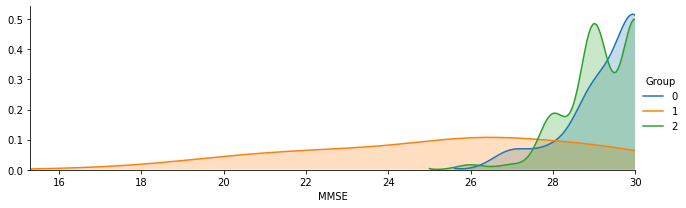

In [21]:
facet = sns.FacetGrid(df, hue='Group',aspect=3)
facet.map(sns.kdeplot,'MMSE',shade='True')
facet.set(xlim=(0,df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

(0.5, 2.0)

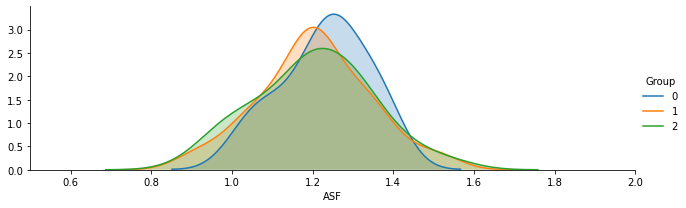

In [22]:
facet = sns.FacetGrid(df, hue='Group',aspect=3)
facet.map(sns.kdeplot,'ASF',shade='True')
facet.set(xlim=(0,df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5,2)

(0.6, 0.9)

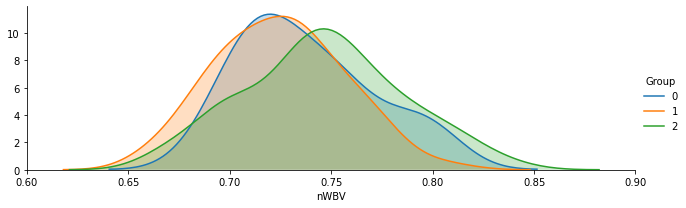

In [23]:
facet = sns.FacetGrid(df, hue='Group',aspect=3)
facet.map(sns.kdeplot,'nWBV',shade='True')
facet.set(xlim=(0,df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

(900.0, 2100.0)

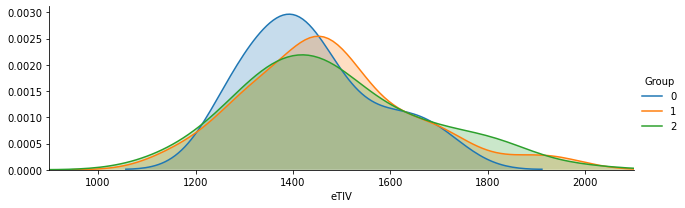

In [24]:
facet = sns.FacetGrid(df, hue='Group',aspect=3)
facet.map(sns.kdeplot,'eTIV',shade='True')
facet.set(xlim=(0,df['eTIV'].max()))
facet.add_legend()
plt.xlim(900,2100)

(0.0, 0.16)

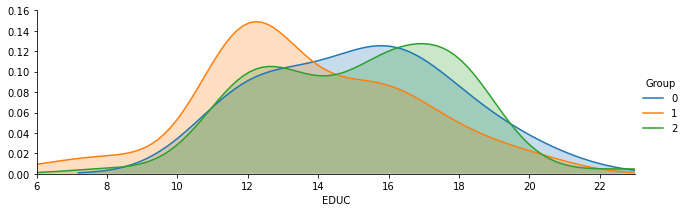

In [25]:
facet = sns.FacetGrid(df, hue='Group',aspect=3)
facet.map(sns.kdeplot,'EDUC',shade=True)
facet.set(xlim=(df['EDUC'].min(),df['EDUC'].max()))
facet.add_legend()
plt.ylim(0.0, 0.16)

In [26]:
x = df2.iloc[:,df2.columns!='Group']
y = df2.iloc[:,df2.columns=='Group']

In [27]:
x.shape

(142, 11)

In [28]:
x.head()

,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,0,1,0,80,12,4.0,28.0,0.0,1689,0.712,1.039
5,0,0,0,93,14,2.0,30.0,0.0,1272,0.698,1.380
6,0,1,0,68,12,2.0,27.0,0.5,1457,0.806,1.205


In [29]:
y.head()

,Group
0,2
2,2
3,2
5,2
6,1


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_curve, auc

In [31]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.3)

In [32]:
xtrain.head()

,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
84,0,1,0,82,15,3.0,29.0,0.5,1499,0.689,1.171
24,0,1,0,90,12,3.0,21.0,0.5,1307,0.679,1.342
49,0,1,0,75,13,4.0,29.0,0.5,1416,0.766,1.239
103,0,0,0,74,12,3.0,29.0,0.0,1344,0.739,1.306
98,0,0,0,81,15,2.0,28.0,0.0,1486,0.754,1.181


In [33]:
ytrain.head()

,Group
84,1
24,1
49,1
103,2
98,2


In [34]:
from sklearn.svm import SVC

In [35]:
model1 = SVC()

In [36]:
model1.fit(xtrain,ytrain)

SVC()

In [37]:
predic1 = model1.predict(xtest)

In [38]:
acc1 = accuracy_score(predic1,ytest)
acc1

0.4883720930232558

In [39]:
from sklearn.metrics import classification_report

In [40]:
def apply_classifier(model1,xtrain,xtest,ytrain,ytest):
    model1.fit(xtrain,ytrain)
    predictions = model1.predict(xtest)
    print("\n Classification report: \n{}".format(classification_report(ytest,predictions)))

In [42]:
apply_classifier(model1,xtrain,xtest,ytrain,ytest)


 Classification report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        18
           2       0.49      1.00      0.66        21

    accuracy                           0.49        43
   macro avg       0.16      0.33      0.22        43
weighted avg       0.24      0.49      0.32        43



In [44]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
apply_classifier(random_forest,xtrain,xtest,ytrain,ytest)


 Classification report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.95      1.00      0.97        18
           2       0.88      1.00      0.93        21

    accuracy                           0.91        43
   macro avg       0.61      0.67      0.64        43
weighted avg       0.82      0.91      0.86        43



In [45]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)
apply_classifier(decision_tree,xtrain,xtest,ytrain,ytest)


 Classification report: 
              precision    recall  f1-score   support

           0       0.17      0.25      0.20         4
           1       0.95      1.00      0.97        18
           2       0.89      0.76      0.82        21

    accuracy                           0.81        43
   macro avg       0.67      0.67      0.66        43
weighted avg       0.85      0.81      0.83        43



In [46]:
from keras.models import Sequential
from keras.layes import Dense
from keras.layes import Dropout

ModuleNotFoundError: No module named 'keras'